# Введение в машинное обучение

## Семинар #5

### Екатерина Кондратьева

ekaterina.kondrateva@skoltech.ru

## Деревья решений (Decision Trees). Случайный лес (Random Forest)

## 1. Деревья решений (Decision Trees)

Дерево принятия решений (также может называться деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны атрибуты, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — атрибуты, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.  

Источники:
1. Лекция https://ru.coursera.org/lecture/supervised-learning/rieshaiushchiie-dieriev-ia-HZxD1 
2. https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/
3. https://habr.com/ru/post/171759/
4. https://www.hse.ru/mirror/pubs/share/215285956

In [ ]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Recap прошлого занятия: классификация на выборке ирисов kNN

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

In [ ]:
pair=[0, 1]
X = X_train[:, [0, 1]]
y = y_train

n_classes = 3
plot_colors = "ryb"
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = KNeighborsClassifier(n_neighbors=30, 
                           metric='chebyshev', 
                           p=2).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(clf.score(X_test[:, [0, 1]], y_test))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 10))
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)

#### А теперь на Деревьях Решений:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = X_train[:, pair]
    y = y_train

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.figure(figsize=(30,20))
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(clf.score(X_test[:, pair], y_test))
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=50)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

#### Деревья решений можно визуализировать:

Пример классификации данного датасета
    
!['деревьеярешений'](https://scikit-learn.org/stable/_images/iris.png)

In [ ]:
#!pip install --upgrade pydotplus
#!pip install --upgrade graphviz
# если визуализация не запустилась - установить https://graphviz.gitlab.io/ и указать путь до environement в системе 

"""
Add graphviz installed path (C:...\graphviz\bin) 
to Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Edit > New
"""

In [ ]:
import pydotplus 
from IPython.display import Image
from sklearn import tree

pair = [0, 1]
X = X_train[:, pair]
y = y_train

clf = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X, y)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                 feature_names=['petal length', 
                                                'petal width'],  
                                 class_names=iris.target_names,  
                                 filled=True, rounded=True,
                                 special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
print(clf.score(X_test[:, pair], y_test))
Image(graph.create_png())  

### Как переобучиться на Деревьях Решений?

In [ ]:
pair = [0, 1]
X = X_train[:, pair]
y = y_train

clf = DecisionTreeClassifier(random_state=42, max_depth=30).fit(X, y)  # сказать про min_samples_split

dot_data = tree.export_graphviz(clf, out_file=None, 
                                 feature_names=['petal length', 
                                                'petal width'],  
                                 class_names=iris.target_names,  
                                 filled=True, rounded=True,
                                 special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
print(clf.score(X_test[:, pair], y_test))
Image(graph.create_png())  

Посмотрим на справку функции в `sklearn`:

In [ ]:
DecisionTreeClassifier()

Выбор критерия:
    http://www.machinelearning.ru/wiki/images/8/89/Sem3_trees.pdf

In [ ]:
plt.rcParams['figure.figsize'] = (15,10)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от p+ (бинарная классификация)')
plt.legend();

### Регрессия на Деревьях Решений:

In [ ]:
# Recap KNN 
from sklearn.neighbors import KNeighborsRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() 
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = KNeighborsRegressor(n_neighbors=30, 
                          metric='chebyshev', 
                         ).fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

In [ ]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = DecisionTreeRegressor().fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

In [ ]:
clf = DecisionTreeRegressor(min_samples_split=10,min_samples_leaf=5).fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

В каком из этих трех случаев модель переобучилась? Почему?

# 2. Леса решений: Random Forest Classification (Regression)

In [13]:
from sklearn.datasets import load_wine
wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, stratify=wine.target, random_state=42)

In [ ]:
print(wine.DESCR)

In [14]:
log_reg = LogisticRegression(random_state=42) 
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 0.977
Accuracy on the test set: 0.978


In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier() 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.978


In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(rfc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(rfc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.933


In [17]:
# посмотрим на выбранные характеристики модели
rfc.feature_importances_

array([0.11982202, 0.02508006, 0.02552533, 0.00717143, 0.04483098,
       0.05011449, 0.25867871, 0.00436047, 0.00595445, 0.242937  ,
       0.05430079, 0.06931141, 0.09191285])

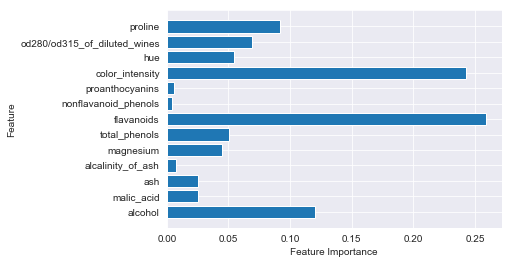

In [18]:
#Feature Importance
n_feature = wine.data.shape[1]
plt.barh(range(n_feature), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), wine.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
#plt.ylim(1)
#plt.xlim(0.5)
plt.show()

#### Вопрос: как данную модель интерпретировать? Как Дерево решений построило решающее правило?

### Задача 1.  
Сравнить решающее правило на Деревьях Решений и Случайных Лесов Решений для регрессионной задачи на выборке `sklearn.datasets.diabets`

In [ ]:
# Визуализации Линейной Регрессии по одному признаку
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

##  Вопросы для самопроверки:

1. В чем отличие Decision Trees от Random Forest?
2. На что влияют критерии построения решающего правила в деревьях?
3. Как интерпретировать результат модели RFC?
4. Почему  важно варьировать `max_depth` дерева?

## Выводы:

1. Дерево – интерпретируемый алгоритм (пока оно не очень глубокое). Random Forest – не интерпретируемый алгоритм
1. max_depth можно находить компромисс между underfitting и overfitting
4. Random Forest борется с изъянами Decision Tree путем построения большого количества разных деревьев и их коллективного голосования.
2. Построение дерева и качество модели сильно зависит от того, удачно ли были выбраны сплиты в начале построения
3. Стандартной реализации для задачи регрессии вам доступны критерии gini, entropy 
5. Качество Random Forest неубывает с увеличением деревьев (не происходит переобучения)

## Задача 1. 
Мы уже знаем 4 принципаильно разных классификатора: LR, KNN, SVC, RFC. 
Сравнить их точности предсказания на датасете `breast cancer`. Использовать классификаторы с натройками по умолчанию. Разбить данные на `train`  и  `test`.

In [76]:
from sklearn.datasets     import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.svm          import SVC
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [77]:
model = LogisticRegression(random_state=42) 
model.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(model.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(model.score(X_test,y_test)))

Accuracy on the training set: 0.953
Accuracy on the test set: 0.958


In [78]:
model = KNeighborsClassifier() 
model.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(model.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(model.score(X_test,y_test)))

Accuracy on the training set: 0.946
Accuracy on the test set: 0.930


In [79]:
model = SVC(random_state=42) 
model.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(model.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(model.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.629


In [80]:
model = DecisionTreeClassifier(random_state=42) 
model.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(model.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(model.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.923


In [81]:
model = RandomForestClassifier() 
model.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(model.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(model.score(X_test,y_test)))

Accuracy on the training set: 0.998
Accuracy on the test set: 0.965


## Задача 2. 
Варьировать параметры классификатора для достижения лучшего `score` на тетсовой выборке. Внести результат в турнирную таблицу:
https://docs.google.com/spreadsheets/d/1ZBdnjXn93pbRh5Z6Lg82FI0OdHXsWFrSvXPKhTSQluI/edit#gid=186001220 

Что можно сказать по поводу переобучени при таком дизайне эксперимента?    

In [82]:
model = RandomForestClassifier(criterion='gini',random_state=42) 
model.fit(X_train, y_train)
print('Accuracy on the test set: {:.3f}'.format(model.score(X_test,y_test)))

Accuracy on the test set: 0.951


In [83]:
model = RandomForestClassifier(criterion='entropy',random_state=42) 
model.fit(X_train, y_train)
print('Accuracy on the test set: {:.3f}'.format(model.score(X_test,y_test)))

Accuracy on the test set: 0.944


In [84]:
model = RandomForestClassifier(criterion='gini',n_estimators=100,random_state=42) 
model.fit(X_train, y_train)
print('Accuracy on the test set: {:.3f}'.format(model.score(X_test,y_test)))

Accuracy on the test set: 0.958


In [85]:
model = RandomForestClassifier(criterion='gini',n_estimators=100,min_samples_split = 2,random_state=42) 
model.fit(X_train, y_train)
print('Accuracy on the test set: {:.3f}'.format(model.score(X_test,y_test)))

Accuracy on the test set: 0.958


In [86]:
model = RandomForestClassifier(criterion='gini',n_estimators=100,min_samples_split = 2,min_samples_leaf = 1, random_state=42) 
model.fit(X_train, y_train)
print('Accuracy on the test set: {:.3f}'.format(model.score(X_test,y_test)))

Accuracy on the test set: 0.958


In [ ]:
На каких характеристиках построены решения?
На каких людях ошибаются?